## Intermediate Data Science

#### University of Redlands - DATA 201
#### Author: Jesus Plascencia
#### 9/22/2025

In [13]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




### You Try - 2 Warm-Up Problems From Lecture

### You Try

See if you can recreate the plot below. The functions used are entered below.

![Rainbow Plot](rainbow.jpg)



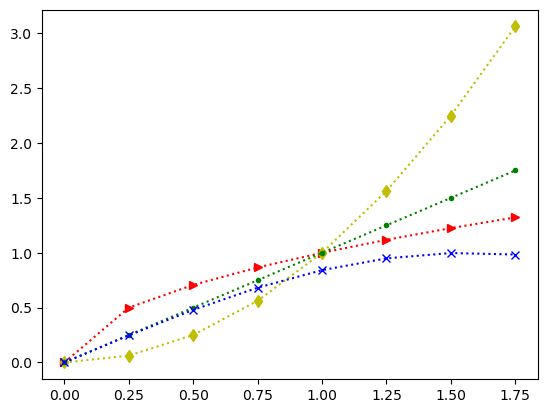

In [42]:
x = np.arange(0,2,.25)
y1 = np.sqrt(x) 
y2 = x**2
y3 = x
y4 = np.sin(x)

# Your code here
plt.plot(x,y1,'r:>')
plt.plot(x,y2, 'y:d')
plt.plot(x,y3, 'g:.')
plt.plot(x,y4, 'b:x')
plt.show()

----------------------------------

### You Try

Now using what you know about annotations and labels. See if you can recreate the plot with the data given below.

![Rainbow Plot Annotated](rainbow_annotate.jpg)

In [48]:
x = np.arange(0, 2, 0.25)
y1 = np.sqrt(x)
y2 = x**2
y3 = x

# Your code here

# Your code here

points = [(1,1), (0,0)]

for point in points:
    plt.annotate(label, xy=(x, spx.asof(y) + 75),
                xytext=(x, spx.asof(date) + 225),  
                 arrowprops=dict(facecolor="black", headwidth=4, width=1,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")
#How does it recognize my x and y points --> ask Bieri

               

NameError: name 'label' is not defined

---------------
## Visualization - Day6 HW

## Homework 6

Import the medical costs dataset:

https://www.kaggle.com/datasets/mirichoi0218/insurance

at this point you should be able to write code using what is provided on kagglehub and pandas to read in the data as a DataFrame. Remember one helpful command

    os.listdir(path)

to list the names of the files that you downloaded.

You job is to:

1.  Do basic EDA - value counts, nan counts, and statistics
2.  Try out a pairplot - comment on any trends, outliers, or interesting distributions.
3. Make a few plots of your own exploring the data. For example:

- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.

For part 3, your goal is to make multiple plots. You don't have to answer every question, but really try to practice all of the ideas from lecture. You must use each of the following at least once:

1. Plotly
2. Matlplotlib
3. Seaborn

(extra) Pandas

(extra) Bokeh
    
------------------------------------

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|███████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 910kB/s]

Extracting files...
Path to dataset files: /home/bellajagu/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1
